In [1]:
#import cdd
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from itertools import product
from modulus_tools import demo_graphs
from modulus_tools import algorithms as alg
from modulus_tools.basic_algorithm import matrix_modulus, modulus
 #from file import minimumobject
from minimum_degree import VertexbasedMinimumSpanningTree

In [2]:
def MOD(G):
    'space R^V'
    m = len(G.nodes())
    'object'
    mst = VertexbasedMinimumSpanningTree(G)
    'Computing modulus'
    mod, cons, rho, lam = modulus(m, matrix_modulus, mst, max_iter=400)
    'Draw graph'
    pos = nx.spring_layout(G)
    plt.figure(figsize=(6,6))
    nx.draw(G, pos, node_size=300, edge_color='black', width=2, node_color = np.around(rho,10), cmap=plt.cm.Set2)
    labels = {u:u for u in G.nodes}
    nx.draw_networkx_labels(G, pos,labels=labels, font_size=12)
    return mod, cons, rho, lam

In [6]:
def drawmod(G):
    'space R^V'
    m = len(G.nodes())
    'object'
    mst = VertexbasedMinimumSpanningTree(G)
    'Computing modulus'
    mod, cons, rho, lam = modulus(m, matrix_modulus, mst, max_iter=400)
    eta = rho/mod
    'Draw graph'
    pos = nx.spring_layout(G)
    labels = {u:round(eta[u],4) for u in G.nodes}
    nodes = [u for u in G.nodes if round(eta[u],4) > 0]
    nx.draw(G, pos, node_size=100, node_color='black', edge_color='gray')
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color='white')
    nx.draw_networkx_labels(G, pos,labels=labels, font_size=12)
    return mod, cons, rho, lam

In [4]:
#edge spanning trees
from modulus_tools.families.networkx_families import MinimumSpanningTree
def MODU(G):
    m = len(G.edges())
    pos = nx.spring_layout(G)
    mst = MinimumSpanningTree(G)
    mod, cons, rho, lam = modulus(m, matrix_modulus, mst, max_iter=400)
    plt.figure(figsize=(5,5))
    nx.draw(G, pos, node_size=50, node_color='black', width=2, edge_color=np.around(rho,10), edge_cmap=plt.cm.Set2)
    return mod, cons, rho, lam

[1.5 1.5 1.5 1.5]
[[(0, 1), (0, 3), (1, 2)], [(2, 3), (0, 3), (1, 2)]]
[0.11111111 0.11111111]


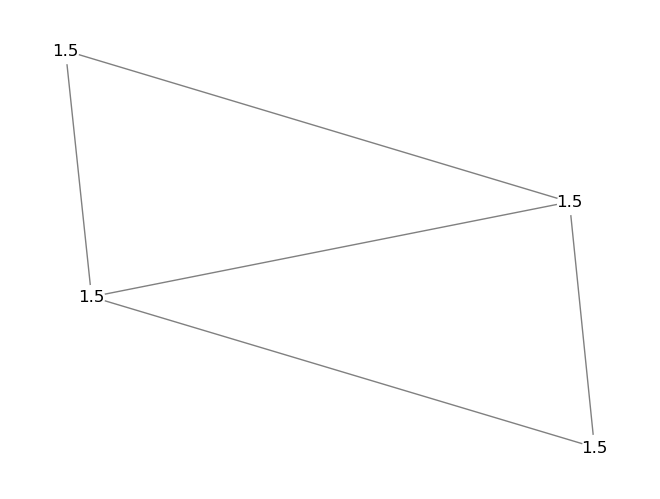

In [7]:
#Ex1
G= nx.Graph()
nx.add_path(G,(0,1,2,3,0))
nx.add_path(G,(1,3))
#nx.add_path(G,(0,2))
mod, cons, rho, lam = drawmod(G)
eta = rho/mod
print(eta)
print(cons)
print(lam)

[1. 2. 1. 2. 2.]
[[(0, 1), (1, 3), (2, 4), (3, 4)]]


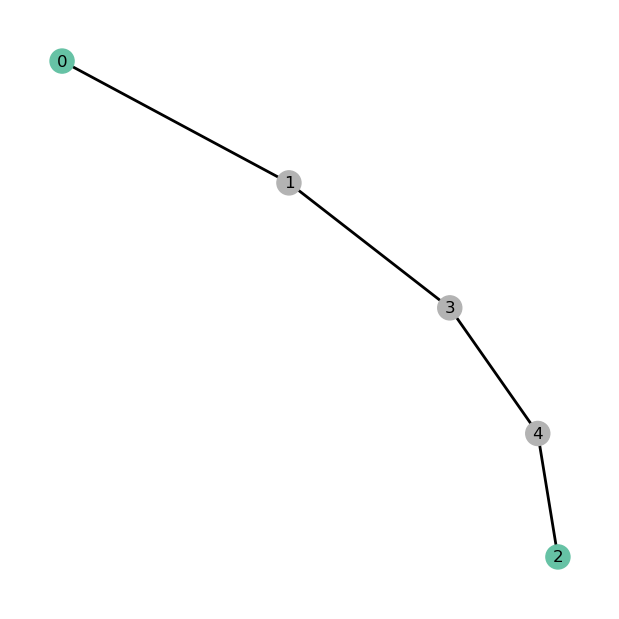

In [6]:
seed = 123
G = nx.random_geometric_graph(5, 0.4, seed=seed)
mod, cons, rho, lam =MOD(G);
eta = rho/mod
print(eta)
print(cons)

[0.6 0.6 0.6 0.6 0.6]
[[(0, 1), (0, 3), (1, 2)], [(1, 3), (2, 3), (0, 1)], [(0, 3), (1, 2), (1, 3)], [(2, 3), (0, 3), (1, 2)]]
[0.22222222 0.44444444 0.22222222 0.22222222]


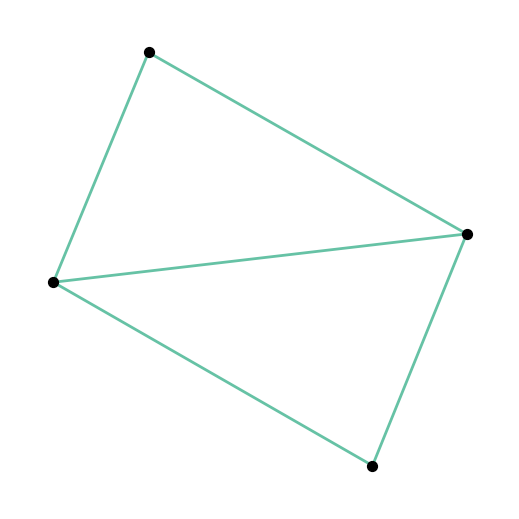

In [7]:
G= nx.Graph()
nx.add_path(G,(0,1,2,3,0))
nx.add_path(G,(1,3))
#nx.add_path(G,(0,2))
mod, cons, rho, lam = MODU(G)
eta = rho/mod
print(eta)
print(cons)
print(lam)

[1.5 2.  1.5 2.  1.5 1.5]
[[(0, 1), (0, 2), (1, 3), (3, 4), (3, 5)], [(4, 5), (0, 2), (1, 2), (3, 4), (1, 3)], [(4, 5), (0, 2), (0, 1), (3, 5), (1, 3)]]
[0.         0.05882353 0.05882353]


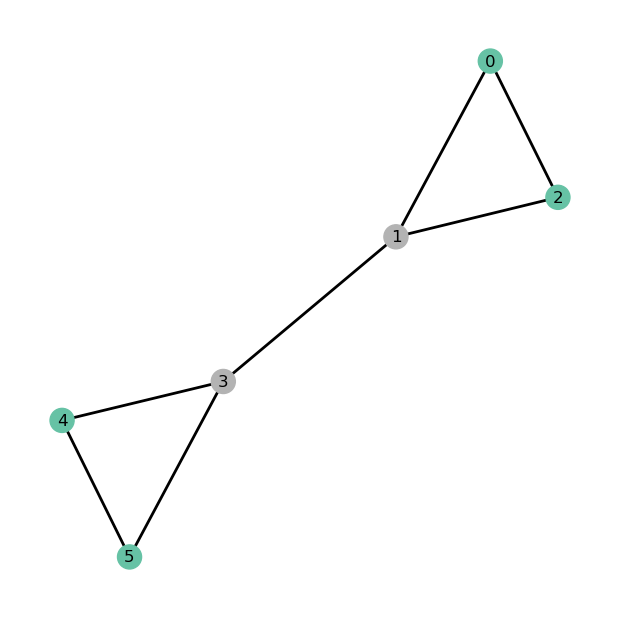

In [8]:
#Nov 7, ex2
G= nx.Graph()
nx.add_path(G,(0,1,2,0))
nx.add_path(G,(1,3,4,5,3))
mod, cons, rho, lam = MOD(G)
eta = rho/mod
print(eta)
print(cons)
print(lam)

[1.66666667 1.66666667 1.66666667 1.66666667 1.66666667 1.66666667]
[[(0, 1), (0, 2), (0, 5), (1, 3), (3, 4)], [(4, 5), (1, 2), (3, 4), (0, 2), (0, 5)], [(1, 3), (1, 2), (3, 4), (3, 5), (0, 1)]]
[0.   0.08 0.04]


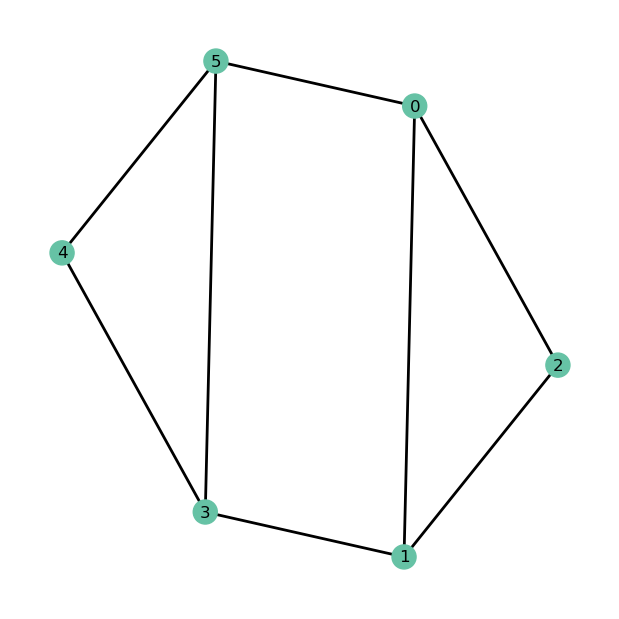

In [9]:
#Nov 7, ex3
G= nx.Graph()
nx.add_path(G,(0,1,2,0))
nx.add_path(G,(1,3,4,5,3))
nx.add_path(G,(0,5))
mod, cons, rho, lam = MOD(G)
eta = rho/mod
print(eta)
print(cons)
print(lam)

[1.         2.         1.66666667 1.66666667 1.66666667]
[[(0, 1), (1, 2), (1, 4), (2, 3)], [(3, 4), (2, 3), (0, 1), (1, 4)], [(2, 3), (2, 4), (0, 1), (1, 2)]]
[0.   0.1  0.05]


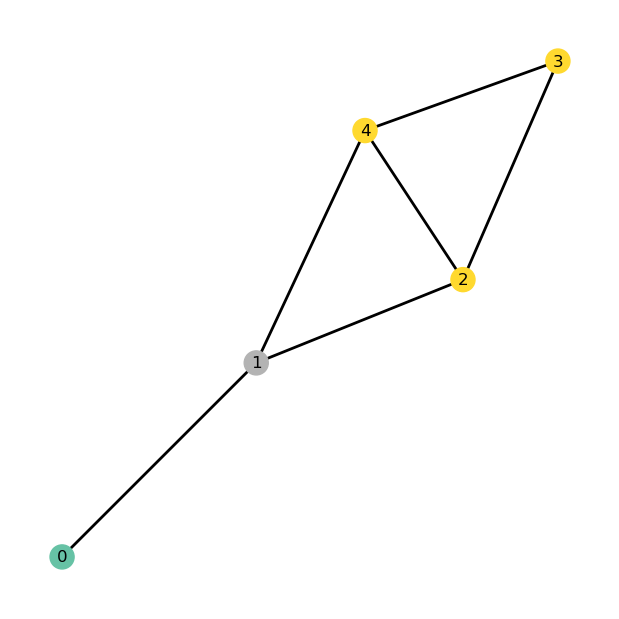

In [10]:
#EX4
G = nx.Graph()
nx.add_path(G,[0,1,2,3,4,2])
nx.add_path(G,[1,4])
mod, cons, rho, lam = MOD(G)
eta = rho/mod
print(eta)
print(cons)
print(lam)

[1.75 1.75 1.75 1.75 1.75 1.75 1.75 1.75]
[[(0, 1), (0, 2), (0, 4), (0, 6), (1, 5), (1, 7), (2, 3)], [(3, 4), (3, 7), (4, 5), (6, 7), (2, 3), (1, 4), (0, 4)], [(2, 5), (6, 7), (1, 5), (1, 6), (2, 3), (0, 6), (4, 5)], [(2, 7), (3, 7), (6, 7), (1, 7), (4, 7), (0, 2), (2, 5)], [(3, 7), (2, 3), (0, 6), (6, 7), (3, 4), (0, 1), (2, 5)], [(1, 5), (3, 7), (4, 5), (1, 7), (0, 1), (6, 7), (2, 5)], [(0, 4), (4, 5), (0, 6), (0, 2), (4, 7), (3, 7), (0, 1)], [(2, 5), (2, 3), (4, 5), (0, 2), (1, 5), (2, 7), (0, 6)]]
[0.01316878 0.01847766 0.02454495 0.00434363 0.01213458 0.00517099
 0.00289575 0.0008963 ]


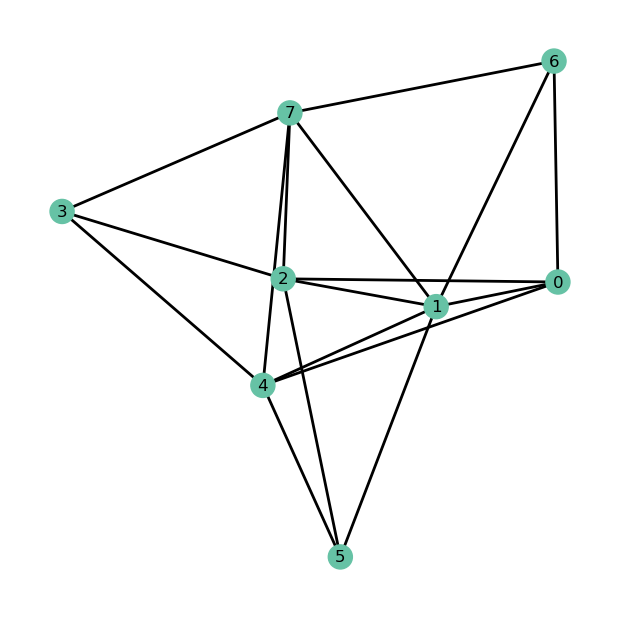

In [11]:
# Ex1
import random as rnd
seed= 123
G = nx.gnp_random_graph(8,0.4,seed)
mod, cons, rho, lam = MOD(G)
eta = rho/mod
print(eta)
print(cons)
print(lam)

[1.75 1.75 1.75 1.75 1.75 1.75 1.75 1.75]
[[(0, 1), (0, 2), (0, 4), (0, 6), (1, 7), (2, 3), (2, 5)], [(3, 7), (4, 5), (4, 7), (6, 7), (1, 4), (2, 3), (0, 4)], [(2, 5), (6, 7), (1, 7), (2, 3), (0, 6), (3, 7), (4, 5)], [(1, 4), (4, 5), (0, 1), (0, 6), (2, 5), (1, 7), (2, 3)], [(0, 6), (0, 4), (6, 7), (4, 5), (0, 1), (2, 3), (3, 7)], [(2, 3), (4, 5), (0, 6), (1, 4), (2, 5), (6, 7), (0, 4)], [(2, 3), (1, 4), (3, 7), (0, 6), (4, 5), (6, 7), (0, 1)], [(2, 3), (2, 5), (3, 7), (0, 6), (4, 5), (0, 2), (0, 1)], [(2, 3), (4, 5), (2, 5), (3, 7), (1, 4), (0, 6), (0, 1)], [(0, 6), (6, 7), (2, 5), (2, 3), (0, 1), (4, 5), (1, 4)]]
[0.00000000e+00 0.00000000e+00 2.04081633e-02 1.21787637e-15
 0.00000000e+00 7.39940775e-16 2.04081633e-02 3.84592537e-16
 2.04081633e-02 2.04081633e-02]


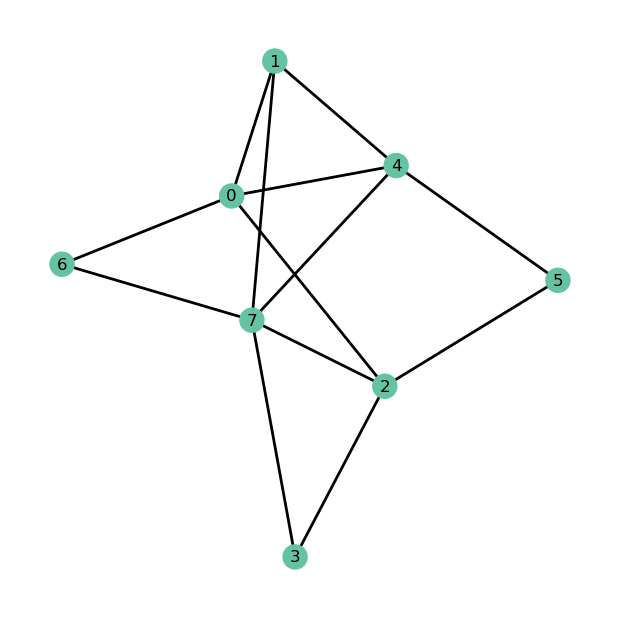

In [14]:
#Ex2
seed= 123
G = nx.gnp_random_graph(8,0.3,seed)
mod, cons, rho, lam = MOD(G)
eta = rho/mod
print(eta)
print(cons)
print(lam)


[1.5 1.5 1.5 1.5]
[[(0, 1), (0, 3), (1, 2)], [(2, 3), (0, 3), (1, 2)]]
[0.11111111 0.11111111]


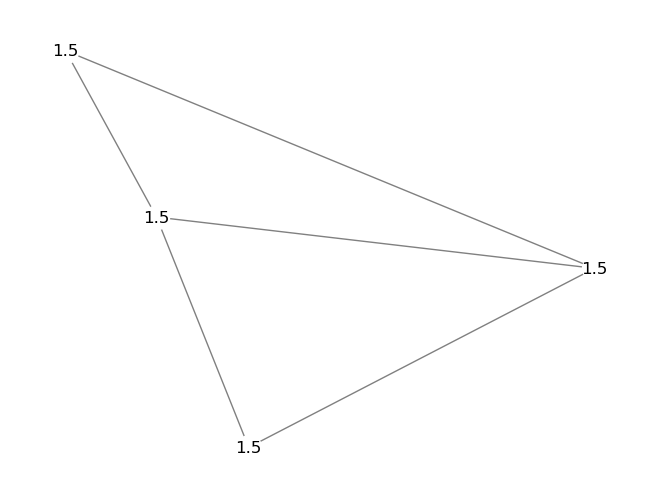

In [8]:
#Nov 10 Ex1
G= nx.Graph()
nx.add_path(G,(0,1,2,3,0))
nx.add_path(G,(1,3))
#nx.add_path(G,(0,2))
mod, cons, rho, lam = drawmod(G)
eta = rho/mod
print(eta)
print(cons)
print(lam)

[1.5 2.  1.5 2.  1.5 1.5]
[[(0, 1), (0, 2), (1, 3), (3, 4), (3, 5)], [(4, 5), (0, 2), (1, 2), (3, 4), (1, 3)], [(4, 5), (0, 2), (0, 1), (3, 5), (1, 3)]]
[0.         0.05882353 0.05882353]


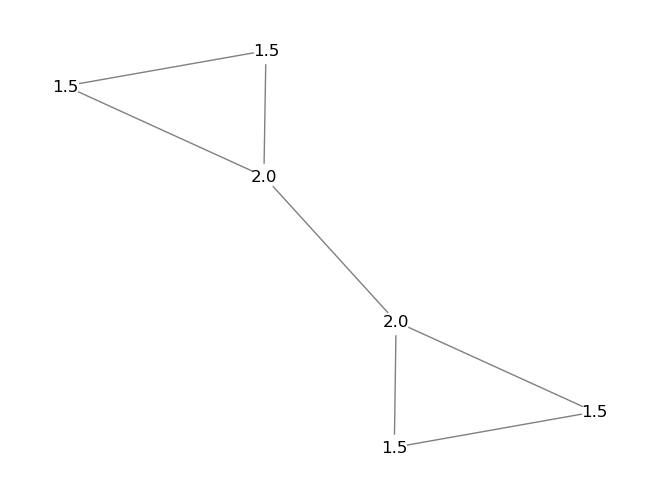

In [9]:
#Nov 7, ex2
G= nx.Graph()
nx.add_path(G,(0,1,2,0))
nx.add_path(G,(1,3,4,5,3))
mod, cons, rho, lam = drawmod(G)
eta = rho/mod
print(eta)
print(cons)
print(lam)

[1.         2.         1.66666667 1.66666667 1.66666667]
[[(0, 1), (1, 2), (1, 4), (2, 3)], [(3, 4), (2, 3), (0, 1), (1, 4)], [(2, 3), (2, 4), (0, 1), (1, 2)]]
[0.   0.1  0.05]


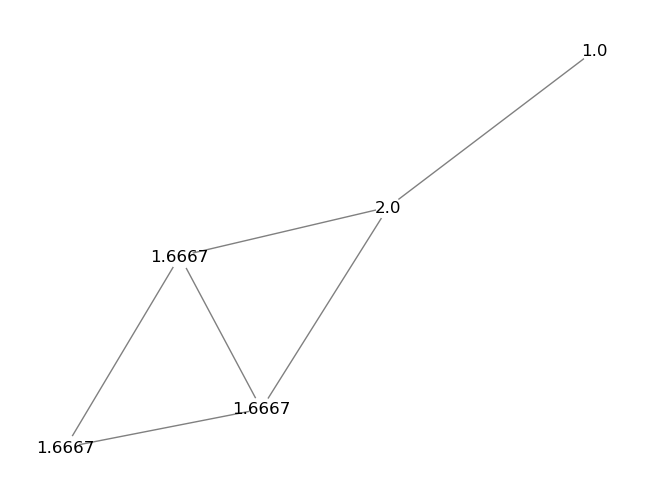

In [10]:
#Nov 7, ex3
G = nx.Graph()
nx.add_path(G,[0,1,2,3,4,2])
nx.add_path(G,[1,4])
mod, cons, rho, lam = drawmod(G)
eta = rho/mod
print(eta)
print(cons)
print(lam)

[1.5 2.  1.5 2.  1. ]
[[(0, 1), (0, 3), (1, 2), (3, 4)], [(1, 2), (2, 3), (3, 4), (0, 1)]]
[0.07407407 0.07407407]


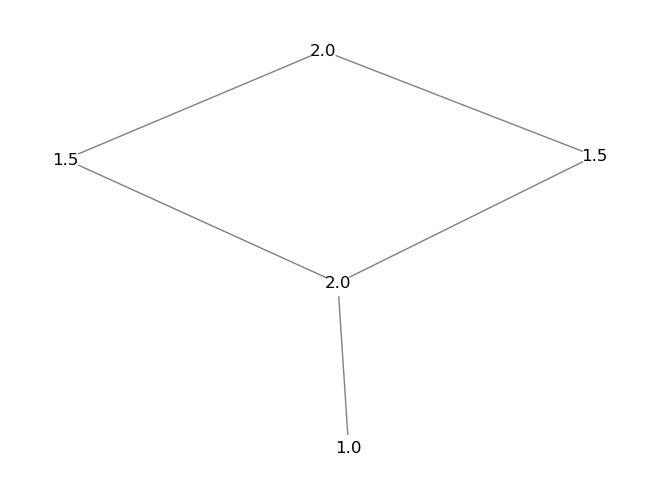

In [12]:
#Nov 7, ex4
G = nx.Graph()
nx.add_path(G,[0,1,2,3,0])
nx.add_path(G,[3,4])
mod, cons, rho, lam = drawmod(G)
eta = rho/mod
print(eta)
print(cons)
print(lam)

[1.5 1.5 1.5 1.5]
[[(0, 1), (0, 3), (1, 2)], [(2, 3), (0, 3), (1, 2)]]
[0.11111111 0.11111111]


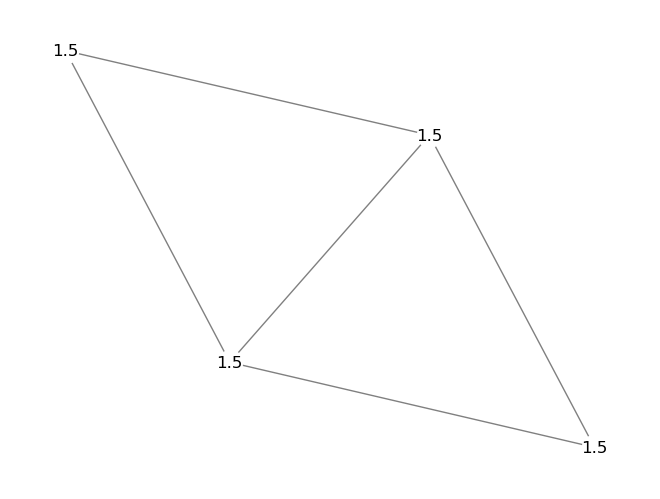

In [13]:
#Nov 7, ex4
G = nx.Graph()
nx.add_path(G,[0,1,2,3,0])
nx.add_path(G,[1,3])
mod, cons, rho, lam = drawmod(G)
eta = rho/mod
print(eta)
print(cons)
print(lam)

[1.5 1.5 2.  2.  1. ]
[[(0, 1), (0, 2), (2, 3), (3, 4)], [(0, 1), (1, 2), (3, 4), (2, 3)]]
[0.07407407 0.07407407]


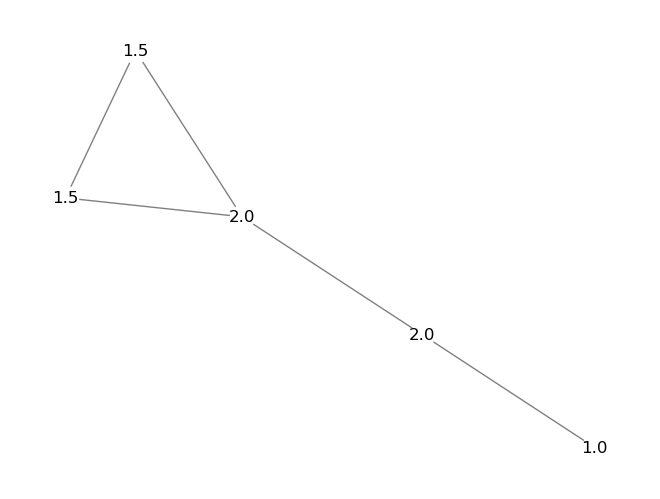

In [14]:
#Nov 7, ex5
G = nx.Graph()
nx.add_path(G,[0,1,2,0])
nx.add_path(G,[2,3,4])
mod, cons, rho, lam = drawmod(G)
eta = rho/mod
print(eta)
print(cons)
print(lam)

[1.5 1.5 2.  3.  1.  1. ]
[[(0, 1), (0, 2), (2, 3), (3, 4), (3, 5)], [(0, 1), (1, 2), (3, 4), (3, 5), (2, 3)]]
[0.05128205 0.05128205]


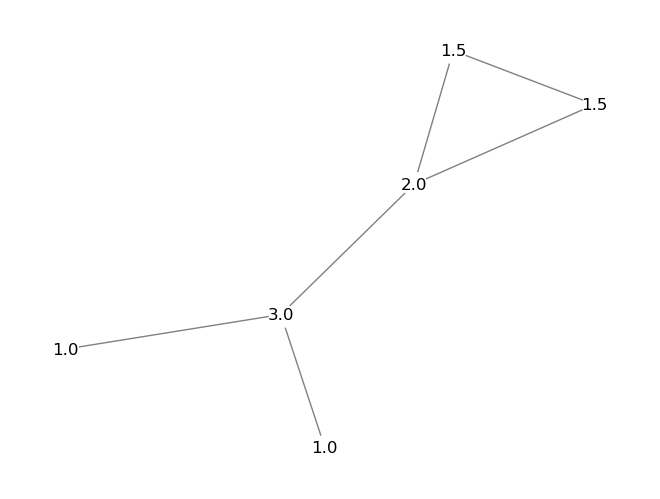

In [15]:
#Nov 7, ex5
G = nx.Graph()
nx.add_path(G,[0,1,2,0])
nx.add_path(G,[2,3,4])
nx.add_path(G,[3,5])
mod, cons, rho, lam = drawmod(G)
eta = rho/mod
print(eta)
print(cons)
print(lam)

[3. 2. 3. 1. 1. 1. 1.]
[[(0, 1), (0, 2), (0, 5), (0, 6), (2, 3), (2, 4)], [(1, 2), (2, 3), (2, 4), (0, 1), (0, 5), (0, 6)]]
[0.         0.07692308]


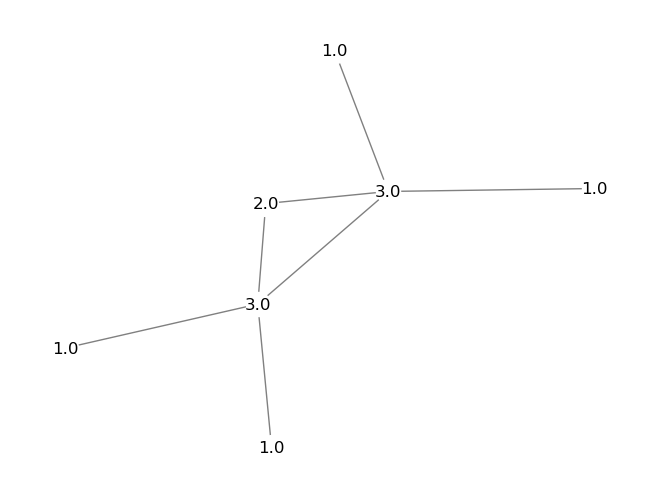

In [18]:
#Nov 7, ex6
G = nx.Graph()
nx.add_path(G,[0,1,2,0])
nx.add_path(G,[2,3])
nx.add_path(G,[2,4])
nx.add_path(G,[0,5])
nx.add_path(G,[0,6])
mod, cons, rho, lam = drawmod(G)
eta = rho/mod
print(eta)
print(cons)
print(lam)

[2. 2. 3. 1. 1. 2. 1.]
[[(0, 1), (0, 2), (0, 5), (0, 6), (2, 3), (2, 4)], [(1, 5), (1, 2), (2, 3), (2, 4), (0, 1), (0, 6)], [(1, 5), (0, 5), (0, 6), (2, 3), (2, 4), (1, 2)]]
[2.77555756e-17 6.40987562e-17 8.33333333e-02]


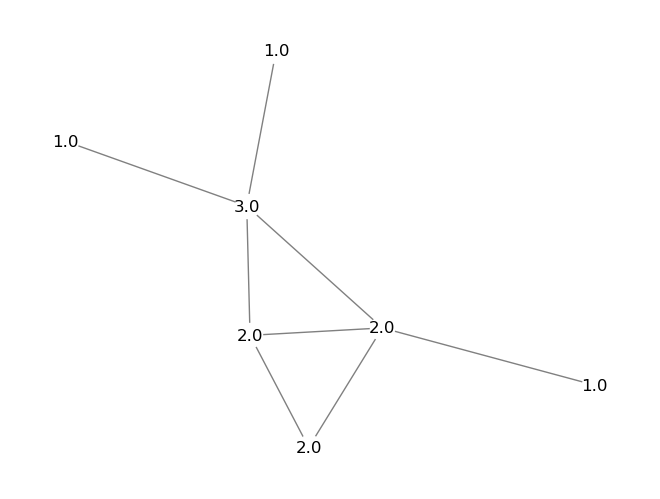

In [19]:
#Nov 7, ex7
G = nx.Graph()
nx.add_path(G,[0,1,2,0])
nx.add_path(G,[2,3])
nx.add_path(G,[2,4])
nx.add_path(G,[0,5])
nx.add_path(G,[0,6])
nx.add_path(G,[1,5])
mod, cons, rho, lam = drawmod(G)
eta = rho/mod
print(eta)
print(cons)
print(lam)

[0.08920188 0.07981221 0.09859155 0.04694836 0.07981221 0.07981221
 0.08920188]
[1.9 1.7 2.1 1.  1.7 1.7 1.9]
[[(0, 1), (0, 2), (0, 5), (0, 6), (2, 3), (2, 4)], [(1, 5), (4, 6), (1, 2), (2, 3), (2, 4), (0, 1)], [(4, 6), (0, 5), (0, 6), (1, 5), (2, 3), (2, 4)], [(0, 1), (1, 5), (2, 3), (0, 6), (4, 6), (1, 2)], [(2, 3), (1, 5), (0, 5), (4, 6), (1, 2), (2, 4)]]
[0.         0.         0.05633803 0.02816901 0.00938967]


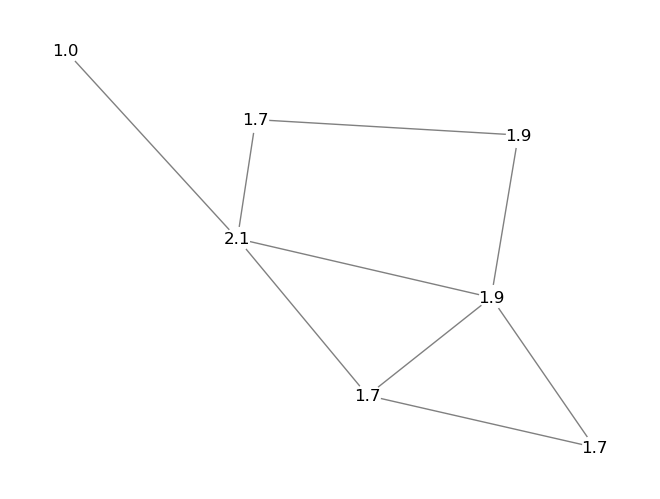

In [24]:
#Nov 7, ex7
G = nx.Graph()
nx.add_path(G,[0,1,2,0])
nx.add_path(G,[2,3])
nx.add_path(G,[2,4])
nx.add_path(G,[0,5])
nx.add_path(G,[0,6])
nx.add_path(G,[1,5])
nx.add_path(G,[4,6])
mod, cons, rho, lam = drawmod(G)
eta = rho/mod
print(rho)
print(eta)

print(cons)
print(lam)